## nsdmd tutorial

Author: Jun Yin, Daniya Seitova

This notebook is a brief introduction to doing Bayesian inference on dark matter distribution models. The package is used to do model comparison on four Dark Matter density profiles: NFW profile, Isothermal profile, Einasto profile and Generalized DM profile by comparing their log evidence in fitting rotational velocity cruve. 
This tutorial gives an example of the calculation of NFW file. We use the density file with unknown parameters to calculate the enclosing mass and the corresponding rotational velocity. The package is designed to read in the data file, which contains r,v and dv and then use the nestle package to sample the posterior distribution of model parameters given the data.

### Getting started

First, import the package. This assumes that the package is already downloaded and installed.
If you need to download and install the package, please see the readme on the github page.

In [ ]:
from nsdmd import model 
from nsdmd import io

We will also import other standard packages that we need for nsdmd package to run. They should have been installed if the installation of the nsdmd package went well.

In [1]:
import numpy as np
import nestle
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import corner
from scipy.integrate import quad

### Importing data 

You will have the data that consists of 3 arrays.
The package supports data in a simple [x, y, z] format where x is a numpy array of the x values and y is a numpy array of the y values and z is a numpy array of the z values.


In [3]:
# The data will be used in this project is the measured rotational speed of 
#    the interstellar medium in our local galaxy, as shown in the following figure. 
# Reference 1: Bhattacharjee et. al.
    
#load data
data_x,data_xerr,data_y,data_yerr =io.load_data('dataref1.txt')

### Visualizing the data

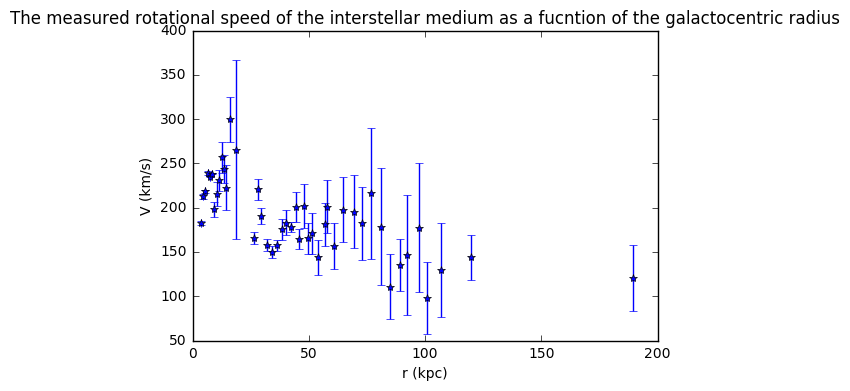

In [5]:
plt.figure()
plt.errorbar(data_x,data_y,xerr=data_xerr,yerr=data_yerr,fmt='*')
plt.xlabel("r (kpc)")
plt.ylabel('V (km/s)')
plt.title("The measured rotational speed of the interstellar medium as a fucntion of the galactocentric radius")
plt.show()

### Nestle

We would like to estimate the parameters of the model that fit the data. To do this, we will do Bayesian parameter estimation by nested sampling algorithms in Nestle package.

Nested Sampling is a computational approach for integrating posterior
probability in order to compare models in Bayesian statistics. It is similar
to Markov Chain Monte Carlo (MCMC) in that it generates samples that can be
used to estimate the posterior probability distribution. Unlike MCMC, the
nature of the sampling also allows one to calculate the integral of the
distribution. 

The reason Nested Sampling is more appropriate for this project than MCMC is
Nested Sampling has the advantage that it calculates the evidence (integral
of the posterior) and this way you can compare different models. It is good
for sampling posterior distributions with strong dependence between
variables. Another advantage of Nested Sampling is that you don’t have to
know where MLE is, while using MCMC we would have to normalize to compare
our models since our models have different number of degrees of freedom. 

For more information, see the Nestle package documentation.

In [ ]:
print(model.sample.__doc__)

### Defining the model

In our package we can compare 4 Dark Matter Density models: NFW, Einasto, Isothermal and Generalized model, which you can select as model_NFW, model_Einasto etc.

### Defining the prior

In our package we have different flat priors for each Dark Matter Density model, which you can select as prior_transform_NFW, prior_transform_Einasto etc.

In [ ]:
# NewModel.results_NFW (loglike_NFW, prior_transform_NFW,'filename' ,[a,b])  # a,b limits prior  
model.sample (model.loglike_NFW, model.prior_transform_NFW, 'dataref1.txt',[10,500])

[add plot of NFW fit]